   mode plane  level         A         B       IoU    meanNN  Hausdorff
20  hdr    XY    100  12h_UNTR  12h_VACV  0.750930  5.081812  23.236215
21  hdr    XY     99  12h_UNTR  12h_VACV  0.634577  5.255348  23.170830
22  hdr    XY     98  12h_UNTR  12h_VACV  0.591358  5.758198  22.632893
23  hdr    XY     97  12h_UNTR  12h_VACV  0.561441  5.111475  17.845996
24  hdr    XY     96  12h_UNTR  12h_VACV  0.534387  5.420998  19.098822


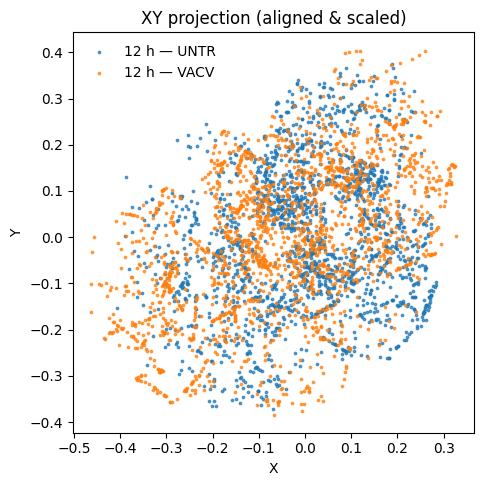

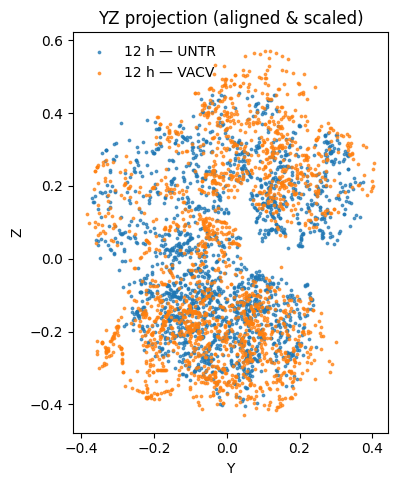

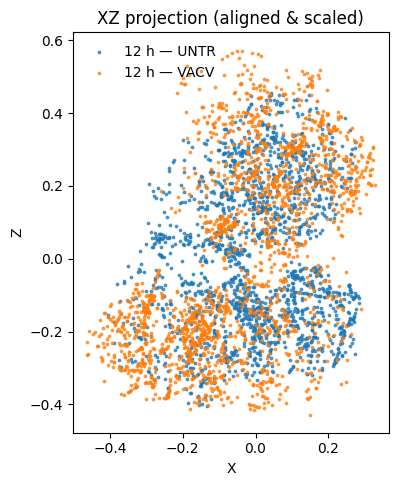

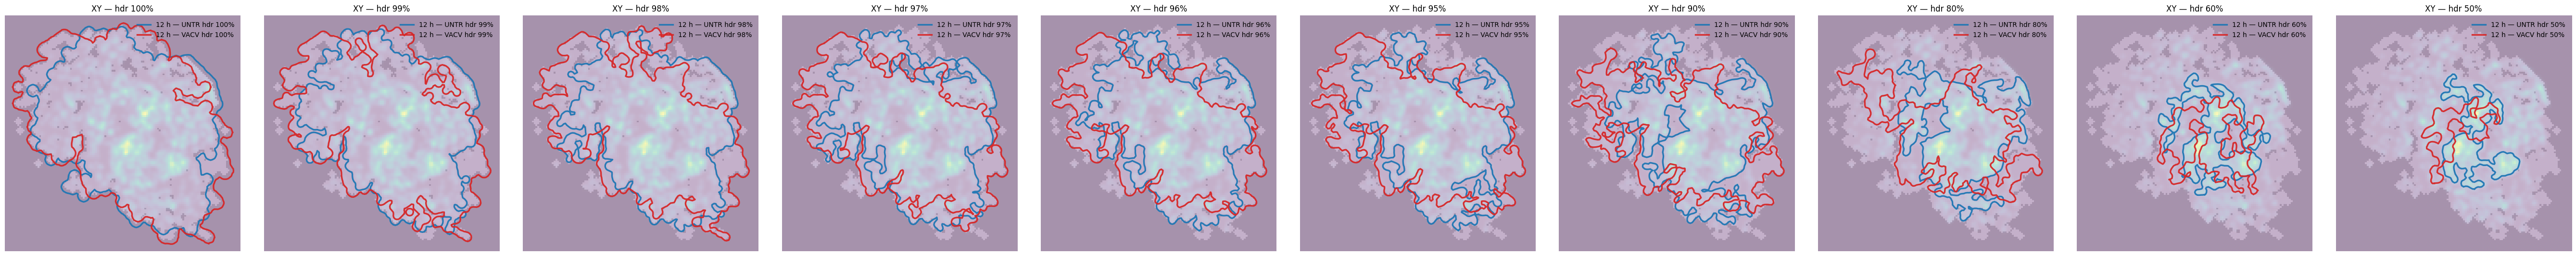

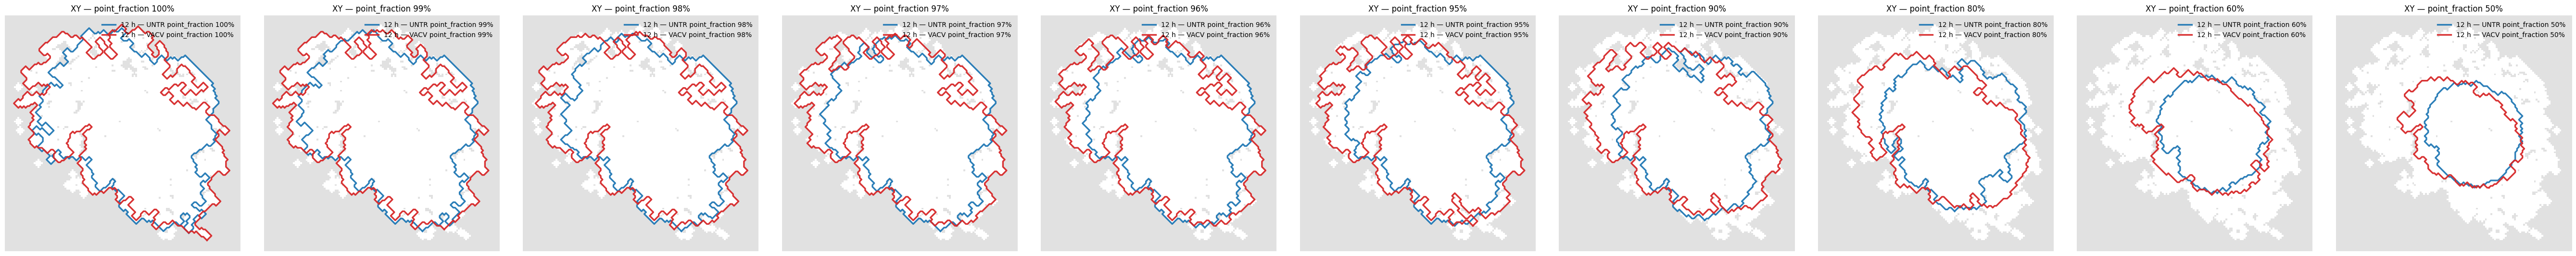

[export] begin: out_dir=data/green_monkey/va_testing/web_data
[export] write: kind=meta, path=data/green_monkey/va_testing/web_data/meta_data.json
[export] write: kind=background_mask, path=data/green_monkey/va_testing/web_data/background_mask.json
[export] write: kind=density, label=12h_UNTR, path=data/green_monkey/va_testing/web_data/density/12h_UNTR_density.json
[export] write: kind=density, label=12h_VACV, path=data/green_monkey/va_testing/web_data/density/12h_VACV_density.json
[export] write: kind=contours, label=12h_UNTR, path=data/green_monkey/va_testing/web_data/contours/12h_UNTR_contour.json, entries=60
[export] write: kind=contours, label=12h_VACV, path=data/green_monkey/va_testing/web_data/contours/12h_VACV_contour.json, entries=60
[export] write: kind=projections, plane=YZ, path=data/green_monkey/va_testing/web_data/projections/YZ_projections.json, labels=2
[export] write: kind=projections, plane=XZ, path=data/green_monkey/va_testing/web_data/projections/XZ_projections.json

In [2]:
# --- imports from your installed package ---
from mpase import (
    mpase,
    CfgCommon, CfgHDR, CfgPF, CfgMorph,
    view_projections, save_projections,
    view, save_figures,
    export_all,
)

# --- inputs ---
csv_list = [
    "data/green_monkey/all_structure_files/chr1/12hrs/untr/structure_12hrs_untr_gene_info.csv",
    "data/green_monkey/all_structure_files/chr1/12hrs/vacv/structure_12hrs_vacv_gene_info.csv",
]
labels = ["12h_UNTR", "12h_VACV"]

out_dir = "data/green_monkey/va_testing/silhouette_analysis_output"

# --- configs ---
cfg_common = CfgCommon(
    grid_base=160,
    pad_frac=0.05,
)

cfg_hdr = CfgHDR(
    n_boot=256,
    rng_seed=0
)

cfg_pf = CfgPF(
    disk_px=2,
    bandwidth=None,  # auto bandwidth (median*0.5)
    # morph=CfgMorph(closing=2, opening=0, keep_largest=True, fill_holes=True)
)

# --- run ---
res = mpase(
    csv_list=csv_list,
    labels=labels,                 # first label is the alignment reference when align_mode="auto"
    run_hdr=True,
    run_pf=True,
    cfg_common=cfg_common,
    cfg_hdr=cfg_hdr,
    cfg_pf=cfg_pf,
    planes=("XY", "YZ", "XZ"),
)

# --- quick check ---
print(res["metrics"].head())

# --- visualize projections ---
view_projections(
    res,
    planes=("XY", "YZ", "XZ"),
    A_lab="12h_UNTR", B_lab="12h_VACV",
    labelA="12 h — UNTR", labelB="12 h — VACV"
)

# save projections (+ optional CSVs)
save_projections(
    res,
    out_dir=out_dir,
    planes=("XY", "YZ", "XZ"),
    A_lab="12h_UNTR", B_lab="12h_VACV",
    labelA="12 h — UNTR", labelB="12 h — VACV",
    save_csv=False
)

# --- HDR overlays ---
view(
    res, kind="hdr", plane="XY", levels="all",
    A_lab="12h_UNTR", B_lab="12h_VACV",
    show_heat=True,
    labelA="12 h — UNTR", labelB="12 h — VACV"
)

# --- PF overlays ---
view(
    res, kind="point_fraction", plane="XY", levels="all",
    A_lab="12h_UNTR", B_lab="12h_VACV",
    labelA="12 h — UNTR", labelB="12 h — VACV"
)

# save figures
save_figures(
    res, kind="hdr", plane="XY", levels="all",
    out_dir=out_dir, show_heat=True,
    A_lab="12h_UNTR", B_lab="12h_VACV",
    labelA="12 h — UNTR", labelB="12 h — VACV"
)

save_figures(
    res, kind="point_fraction", plane="YZ", levels=[95, 50],
    out_dir=out_dir,
    A_lab="12h_UNTR", B_lab="12h_VACV",
    labelA="12 h — UNTR", labelB="12 h — VACV"
)

# --- export web bundle ---
export_all(
    res,
    out_dir="data/green_monkey/va_testing/web_data",
    include_density=True,                    # write density_<label>.json per label
    kind_levels={"hdr": "all", "point_fraction": "all"},  # export all levels
    which_density=None,                      # or e.g. ["12h_UNTR","12h_VACV"]
    export_layout=True,
    export_scales=True,
    progress_report=True
)
